In [13]:
%matplotlib ipympl
from impedance.models.circuits import CustomCircuit
from impedance.models.circuits.elements import element
import numpy as np
import scipy
import matplotlib.pyplot as plt
from impedance.visualization import plot_nyquist, plot_bode
import pandas as pd

In [14]:
def give_weights(z,wt):
    if (wt=="mod"):
        return np.concatenate((np.abs(z),np.abs(z)))
    elif (wt=="prop"):
        return np.concatenate((np.real(z),np.imag(z)))
    elif (wt=="" or wt=="unit"):
        return np.ones(2*len(z))
    
def give_chi_square(zexp,zmodel):
     chi_sqr=np.sum(np.abs((zexp-zmodel))**2)
     return chi_sqr
    
def give_chi_square_wt(zexp,zmodel):
     chi_sqr_wt=np.sum(np.abs((zexp-zmodel))**2/np.abs(zexp)**2)
     return chi_sqr_wt

def give_chi_square_by_N(zexp,zmodel):
     chi_sqr=np.sum(np.abs((zexp-zmodel))**2)
     return np.sqrt((chi_sqr)/len(zexp))

In [15]:
@element(num_params=5, units=["Ohm", "Ohm", "","F",""],overwrite=True)
def TLMtwo(p, f):
   
    omega = 2 * np.pi * np.array(f)
    R1, R1Q, R2Q, delta1, alpha = p[0], p[1], p[2], p[3], p[4]
    delta2=1-delta1
    k12=R2Q/R1Q
    wc1=1/(R1Q)
    wc2=1/(R2Q)
    S1=np.sqrt((omega*1j)**alpha/wc1)
    S2=np.sqrt((omega*1j)**alpha/wc2)
    C1=1/np.tanh(delta1*S1)
    C2=1/np.tanh(delta2*S2)

    Z=2*(R1)*(C1*C2*S1*k12+S2)/(S1*(C2*S1*k12+C1*S2))

    return Z

428.38689518852965

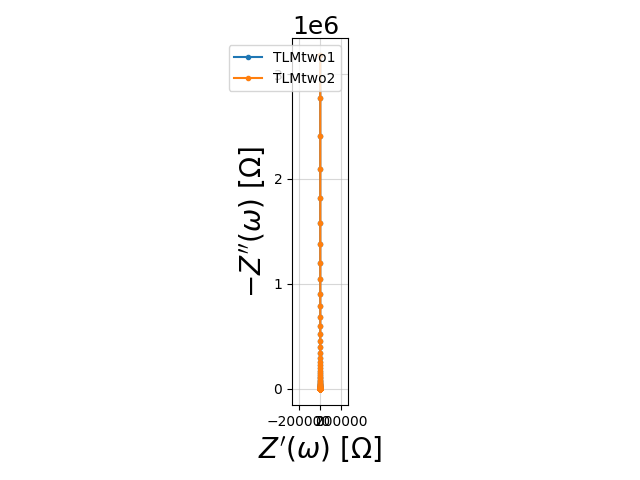

In [16]:
freq=np.logspace(-3,3,100)

c_two1=CustomCircuit(initial_guess=[6000,0.6,0.2,0.2063,1],circuit="TLMtwo1")
c_two2=CustomCircuit(initial_guess=[2000,0.2,0.6,0.2063,1],circuit="TLMtwo2")
c_all=[c_two1,c_two2]

z_two1=c_two1.predict(freq)
z_two2=c_two2.predict(freq)
z_all=[z_two1,z_two2]

fig, ax=plt.subplots()
for c,z in zip(c_all,z_all):
    plot_nyquist(Z=z,ax=ax,label=c.circuit)


ax.set_xlim(-100*np.max(np.real(z_two2)),100*np.max(np.real(z_two2)))
plt.tight_layout()
plt.legend()

give_chi_square_by_N(z_two1,z_two2)
